In [211]:
import glob
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas_ta as pta
import talib as ta

import statsmodels.api as sm
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from xgboost import XGBClassifier
import pandas as pd
import datetime
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima
import math
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,r2_score

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [174]:
#function to extract file name from the full path
def extract_filename(filepath):
    filename = os.path.basename(filepath)
    return filename

In [175]:
#creates a list of dataframes from all the csv files and skips the files with no data
folder_path = 'D://gitrepo/Stocks'
file_paths = glob.glob(folder_path + '\*.txt')
data = {}
skip_count=0
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, delimiter=',')
        if not df.empty:
            file_name=extract_filename(file_path)
            data[file_name]=df
    except pd.errors.EmptyDataError:
        skip_count+=1
print(f"Skipped empty file: ",skip_count)

Skipped empty file:  32


In [176]:
#testing
c=0
for i in data:
    print(i)
    print(data[i].head(2))
    c+=1
    if c>2:
        break 

a.us.txt
         Date    Open    High     Low   Close    Volume  OpenInt
0  1999-11-18  30.713  33.754  27.002  29.702  66277506        0
1  1999-11-19  28.986  29.027  26.872  27.257  16142920        0
aa.us.txt
         Date    Open    High     Low   Close  Volume  OpenInt
0  1970-01-02  2.2972  2.3178  2.2972  2.2972   26437        0
1  1970-01-05  2.2972  2.2972  2.2544  2.2759   29887        0
aaap.us.txt
         Date   Open   High   Low  Close   Volume  OpenInt
0  2015-11-11  18.50  25.90  18.0   24.5  1584600        0
1  2015-11-12  24.25  27.12  22.5   25.0    83000        0


In [177]:
#creating a temporary dataframe
temp_data=data['a.us.txt']

In [178]:
#momentum indicators
temp_data['Momentum']=pta.mom(temp_data['Close'])
temp_data['WILLR']=ta.WILLR(temp_data['High'],temp_data['Low'],temp_data['Close'],timeperiod=14)

stochio=pta.stoch(temp_data['High'],temp_data['Low'],temp_data['Close'])
temp_data=pd.concat([temp_data, stochio], axis=1)
temp_data['SMA 5'] = ta.SMA(temp_data['Close'], timeperiod=5)
temp_data['SMA 8'] = ta.SMA(temp_data['Close'], timeperiod=8)
temp_data['SMA 13'] = ta.SMA(temp_data['Close'], timeperiod=13)
temp_data['SMA 50'] = ta.SMA(temp_data['Close'], timeperiod=50)
temp_data['SMA 200'] = ta.SMA(temp_data['Close'], timeperiod=200)
temp_data['EMA 5'] = ta.EMA(temp_data['Close'], timeperiod=5)
temp_data['EMA 8'] = ta.EMA(temp_data['Close'], timeperiod=8)
temp_data['EMA 13'] = ta.EMA(temp_data['Close'], timeperiod=13)
temp_data['RSI1 14'] = ta.RSI(temp_data['Close'],timeperiod=14)
temp_data['CCI1 14'] = ta.CCI(temp_data['High'],temp_data['Low'],temp_data['Close'],timeperiod=14)




In [179]:
#cycle indicators
temp_data['HT DCPERIOD'] = ta.HT_DCPERIOD(temp_data['Close']) 
temp_data['HT DPCHASE'] = ta.HT_DCPHASE(temp_data['Close']) 
temp_data['inphase'], temp_data['quadrature'] = ta.HT_PHASOR(temp_data['Close']) 
temp_data['sine'], temp_data['leadsine'] = ta.HT_SINE(temp_data['Close']) 
temp_data['HT TRENDMODE'] = ta.HT_TRENDMODE(temp_data['Close']) 


In [180]:
#volatility indicators from talib
temp_data['TR'] = ta.TRANGE(temp_data['High'],temp_data['Low'],temp_data['Close'])
temp_data['ATR'] = ta.ATR(temp_data['High'],temp_data['Low'],temp_data['Close'],timeperiod=14) 


In [181]:
#volatility indicators from pandas_ta
#donchian
#temp_data['DCL'],temp_data['DCM'],temp_data['DCU']=pta.donchian(temp_data['High'],temp_data['Low'],offset=20)
donchian=pta.donchian(temp_data['High'],temp_data['Low'],offset=20)
temp_data=pd.concat([temp_data, donchian], axis=1)
#keltner
#temp_data['KCL'],temp_data['KCB'],temp_data['KCU']=pta.kc(temp_data['High'],temp_data['Low'],temp_data['Close'])
keltner=pta.kc(temp_data['High'],temp_data['Low'],temp_data['Close'])
temp_data=pd.concat([temp_data, keltner], axis=1)


In [182]:
end = temp_data.index[-1]

In [183]:
temp_data["SMA_HL"] = 0
for i in range(10,end):
    MA = 0
    for j in range(i-10,i):
        MA+=temp_data["High"][j]-temp_data["Low"][j]
    temp_data['SMA_HL'][i] = MA/10

C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_25900\503040374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['SMA_HL'][i] = MA/10


In [184]:
#Exponential moving average for High-Low
m = 0.0952
temp_data["EMA_HL"] = 0
temp_data["EMA_HL"][11] = (temp_data["High"][11]-temp_data["Low"][11])*m + temp_data["SMA_HL"][11]*(1-m)
for i in range(12,end):
    temp_data["EMA_HL"][i]= (temp_data["High"][i]-temp_data["Low"][i])*m + temp_data["EMA_HL"][i-1]*(1-m)

C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_25900\2143315643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data["EMA_HL"][11] = (temp_data["High"][11]-temp_data["Low"][11])*m + temp_data["SMA_HL"][11]*(1-m)


In [185]:

temp_data["Chaikin"] = 0
for i in range(21,end):
    temp_data["Chaikin"][i] = (temp_data["EMA_HL"][i] - temp_data["EMA_HL"][i-10])/(temp_data["EMA_HL"][i-10]*100)

C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_25900\264865425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data["Chaikin"][i] = (temp_data["EMA_HL"][i] - temp_data["EMA_HL"][i-10])/(temp_data["EMA_HL"][i-10]*100)


In [186]:
#trend indicators
supertrend=pta.supertrend(temp_data['High'],temp_data['Low'],temp_data['Close'])
temp_data=pd.concat([temp_data, supertrend], axis=1)
bbands=pta.bbands(temp_data['Close'])
temp_data=pd.concat([temp_data, bbands], axis=1)
macd=pta.macd(temp_data['Close'])
temp_data=pd.concat([temp_data, macd], axis=1)
adx=pta.adx(temp_data['High'],temp_data['Low'],temp_data['Close'])
temp_data=pd.concat([temp_data, adx], axis=1)
psar=pta.psar(temp_data['High'],temp_data['Low'],temp_data['Close'])
temp_data=pd.concat([temp_data, psar], axis=1)
test=pta.ichimoku(temp_data['High'],temp_data['Low'],temp_data['Close'])
temp_data=pd.concat([temp_data, test[0]], axis=1)



In [187]:
#volume indicators
temp_data['adosc']=pta.adosc(temp_data['High'],temp_data['Low'],temp_data['Close'],temp_data['Volume'])
temp_data['OBV']=ta.OBV(temp_data['Close'],temp_data['Volume'])
temp_data['MFI']=pta.mfi(temp_data['High'],temp_data['Low'],temp_data['Close'],temp_data['Volume'])
temp_data['PVOL']=pta.pvol(temp_data['Close'],temp_data['Volume'])
temp_data['CMF']=pta.cmf(temp_data['High'],temp_data['Low'],temp_data['Close'],temp_data['Volume'])



In [188]:
temp_data.tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Momentum,WILLR,STOCHk_14_3_3,STOCHd_14_3_3,SMA 5,SMA 8,SMA 13,SMA 50,SMA 200,EMA 5,EMA 8,EMA 13,RSI1 14,CCI1 14,HT DCPERIOD,HT DPCHASE,inphase,quadrature,sine,leadsine,HT TRENDMODE,TR,ATR,DCL_20_20,DCM_20_20,DCU_20_20,KCLe_20_2,KCBe_20_2,KCUe_20_2,SMA_HL,EMA_HL,Chaikin,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,adosc,OBV,MFI,PVOL,CMF
4516,2017-11-06,68.22,68.45,68.220,68.22,995731,0,1.20,-17.241379,85.383190,83.914691,68.154,67.9925,67.676923,65.96440,58.371790,68.117126,67.957878,67.685690,65.598592,105.516624,20.114460,169.957657,0.391335,-0.526608,0.174376,-0.572971,1,0.230,0.708324,63.591,65.1805,66.77,65.939881,67.313398,68.686916,0.7430,0.665133,-0.000621,66.389786,1,66.389786,NaN,67.893355,68.154,68.414645,0.764872,0.626609,0.741276,0.010337,0.730939,38.106074,28.957596,9.854422,66.789180,NaN,0.06,0,64.61125,62.2085,67.850,66.480,NaN,219850.673395,527247767.0,76.984717,6.792877e+07,0.016452
4517,2017-11-07,68.32,68.64,68.040,68.25,966466,0,0.93,-16.091954,85.157546,85.027812,68.198,68.0600,67.782308,66.06278,58.477875,68.161417,68.022794,67.766305,65.849502,96.690786,19.975020,173.581421,0.280706,0.030096,0.111791,-0.623626,1,0.600,0.700586,63.591,65.2255,66.86,66.045607,67.402599,68.759590,0.6910,0.658933,-0.000659,66.415531,1,66.415531,NaN,67.962917,68.198,68.433083,0.689413,0.610599,0.727064,-0.003101,0.730164,39.083005,29.123319,9.251595,66.902029,NaN,0.06,0,64.66875,62.2085,67.885,66.865,NaN,-52425.042287,528214233.0,76.804112,6.596130e+07,-0.001456
4518,2017-11-08,68.10,68.33,67.771,68.11,972616,0,0.72,-31.284916,78.460583,83.000440,68.216,68.0775,67.848462,66.15776,58.578000,68.144278,68.042173,67.815405,63.521141,48.756355,19.955664,179.091299,0.431394,-0.023632,0.015859,-0.695804,1,0.559,0.690473,63.591,65.2805,66.97,66.135740,67.469970,68.804201,0.6840,0.649419,-0.001676,66.415531,1,66.415531,NaN,68.029410,68.216,68.402590,0.547058,0.215955,0.696475,-0.026952,0.723426,39.215349,27.439179,11.499367,67.008108,NaN,0.06,0,64.72100,62.2085,67.885,66.910,NaN,-93164.902452,527241617.0,71.243377,6.624488e+07,0.013457
4519,2017-11-09,67.92,67.98,66.910,67.47,1673083,0,-0.24,-67.039106,61.861341,75.159823,68.084,68.0750,67.883077,66.23174,58.676115,67.919519,67.915024,67.766061,54.103173,-74.320270,20.035519,190.033804,0.321735,-0.052652,-0.174229,-0.819490,1,1.200,0.726868,63.591,65.5955,67.60,66.034241,67.469973,68.905705,0.5909,0.689458,-0.000997,66.415531,1,66.415531,NaN,67.448063,68.084,68.719937,1.868096,0.017248,0.613518,-0.087927,0.701444,37.348526,24.203474,18.604292,NaN,68.6700,0.02,1,64.73375,62.2085,67.790,67.095,NaN,-76485.756834,525568534.0,62.841258,1.128829e+08,-0.031416
4520,2017-11-10,67.35,67.58,66.700,66.81,1704549,0,-1.16,-94.416244,35.753245,58.691723,67.772,67.9225,67.843846,66.27616,58.768545,67.549679,67.669463,67.629481,46.454057,-150.028439,20.237120,205.058178,0.440851,-0.085042,-0.423538,-0.940039,0,0.880,0.737806,63.591,65.7055,67.82,65.940503,67.407118,68.873733,0.0000,0.000000,0.000000,66.415531,1,66.415531,NaN,66.654832,67.772,68.889168,3.296842,0.069447,0.488882,-0.170050,0.658932,35.216413,22.141466,19.052360,NaN,68.6348,0.04,0,64.78950,62.2085,67.685,67.165,NaN,-469476.594369,523863985.0,61.470977,1.138809e+08,-0.049688


In [189]:
column_headers = temp_data.columns.values.tolist()
print("The Column Header :", column_headers)

The Column Header : ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Momentum', 'WILLR', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'SMA 5', 'SMA 8', 'SMA 13', 'SMA 50', 'SMA 200', 'EMA 5', 'EMA 8', 'EMA 13', 'RSI1 14', 'CCI1 14', 'HT DCPERIOD', 'HT DPCHASE', 'inphase', 'quadrature', 'sine', 'leadsine', 'HT TRENDMODE', 'TR', 'ATR', 'DCL_20_20', 'DCM_20_20', 'DCU_20_20', 'KCLe_20_2', 'KCBe_20_2', 'KCUe_20_2', 'SMA_HL', 'EMA_HL', 'Chaikin', 'SUPERT_7_3.0', 'SUPERTd_7_3.0', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ADX_14', 'DMP_14', 'DMN_14', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'adosc', 'OBV', 'MFI', 'PVOL', 'CMF']


In [190]:
temp_data['Date']=pd.to_datetime(temp_data['Date'])


In [191]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [192]:
temp_data.isnull().values.any()
temp_data.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
OpenInt               0
Momentum             10
WILLR                13
STOCHk_14_3_3        15
STOCHd_14_3_3        17
SMA 5                 4
SMA 8                 7
SMA 13               12
SMA 50               49
SMA 200             199
EMA 5                 4
EMA 8                 7
EMA 13               12
RSI1 14              14
CCI1 14              13
HT DCPERIOD          32
HT DPCHASE           63
inphase              32
quadrature           32
sine                 63
leadsine             63
HT TRENDMODE          0
TR                    1
ATR                  14
DCL_20_20            39
DCM_20_20            39
DCU_20_20            39
KCLe_20_2            20
KCBe_20_2            19
KCUe_20_2            20
SMA_HL                0
EMA_HL                0
Chaikin               0
SUPERT_7_3.0          6
SUPERTd_7_3.0         0
SUPERTl_7_3.0   

In [193]:
temp_data = temp_data.drop(['SUPERTl_7_3.0','SUPERTs_7_3.0','PSARl_0.02_0.2','PSARs_0.02_0.2'],axis=1)

In [194]:
temp_data=temp_data.dropna(axis=0, how='any')

In [195]:
temp_data.isnull().values.any()
temp_data.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
OpenInt            0
Momentum           0
WILLR              0
STOCHk_14_3_3      0
STOCHd_14_3_3      0
SMA 5              0
SMA 8              0
SMA 13             0
SMA 50             0
SMA 200            0
EMA 5              0
EMA 8              0
EMA 13             0
RSI1 14            0
CCI1 14            0
HT DCPERIOD        0
HT DPCHASE         0
inphase            0
quadrature         0
sine               0
leadsine           0
HT TRENDMODE       0
TR                 0
ATR                0
DCL_20_20          0
DCM_20_20          0
DCU_20_20          0
KCLe_20_2          0
KCBe_20_2          0
KCUe_20_2          0
SMA_HL             0
EMA_HL             0
Chaikin            0
SUPERT_7_3.0       0
SUPERTd_7_3.0      0
BBL_5_2.0          0
BBM_5_2.0          0
BBU_5_2.0          0
BBB_5_2.0          0
BBP_5_2.0          0
MACD_12_26_9       0
MACDh_12_26_9

In [196]:
temp_data.tail(10)

,Date,Open,High,Low,Close,Volume,OpenInt,Momentum,WILLR,STOCHk_14_3_3,STOCHd_14_3_3,SMA 5,SMA 8,SMA 13,SMA 50,SMA 200,EMA 5,EMA 8,EMA 13,RSI1 14,CCI1 14,HT DCPERIOD,HT DPCHASE,inphase,quadrature,sine,leadsine,HT TRENDMODE,TR,ATR,DCL_20_20,DCM_20_20,DCU_20_20,KCLe_20_2,KCBe_20_2,KCUe_20_2,SMA_HL,EMA_HL,Chaikin,SUPERT_7_3.0,SUPERTd_7_3.0,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,PSARaf_0.02_0.2,PSARr_0.02_0.2,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,adosc,OBV,MFI,PVOL,CMF
4485,2017-09-22,65.717,66.136,65.577,65.647,1185191,0,0.759,-25.360668,80.321438,85.040233,65.8744,65.756500,65.577615,62.34468,55.259715,65.769542,65.676677,65.350714,65.242292,44.241346,36.018545,187.337780,0.280077,-0.141736,-0.127719,-0.791627,1,0.559,0.743645,58.102,60.6695,63.237,63.373992,64.784640,66.195288,0.6407,0.674557,-0.001767,63.976215,1,65.595475,65.8744,66.153325,0.846840,0.092364,1.106770,-0.085441,1.192211,35.422030,29.253239,14.322856,0.02,0,60.19800,59.9840,65.6715,63.2365,67.49,1.132675e+05,513372379.0,66.461913,7.780423e+07,0.150290
4486,2017-09-25,65.667,65.767,64.310,64.599,1845570,0,-1.377,-71.649269,60.981501,75.677250,65.6050,65.668000,65.579154,62.40876,55.359910,65.379361,65.437193,65.243326,53.127494,-97.518014,36.659480,189.463019,0.366281,0.287291,-0.164411,-0.813741,1,1.457,0.794599,58.102,60.6695,63.237,63.213136,64.766960,66.320785,0.6118,0.749045,-0.000899,63.976215,1,64.563506,65.6050,66.646494,3.175043,0.017040,0.958809,-0.186721,1.145531,33.121797,25.421839,23.836334,0.04,0,60.19800,59.9840,65.3125,63.2365,68.03,-3.881248e+05,511526809.0,63.377528,1.192220e+08,0.108544
4487,2017-09-26,64.519,64.769,63.781,63.980,1618616,0,-2.026,-92.146803,36.947753,59.416897,65.1938,65.472125,65.500077,62.45986,55.453000,64.912907,65.113372,65.062851,47.515279,-198.100950,36.330084,196.710549,0.597599,-0.195323,-0.287537,-0.880565,1,0.988,0.808413,58.102,60.7740,63.446,63.097980,64.692012,66.286043,0.6717,0.771794,-0.000292,63.976215,1,63.653586,65.1938,66.734014,4.725031,0.105964,0.782580,-0.290360,1.072941,31.220365,23.202608,26.429571,0.06,0,60.19800,59.9840,65.0480,63.5760,68.02,-8.655047e+05,509908193.0,56.853313,1.035591e+08,0.044480
4488,2017-09-27,64.140,64.529,63.920,64.260,1263271,0,-1.047,-81.097080,18.368949,38.766068,64.8546,65.276375,65.451769,62.52334,55.545015,64.695272,64.923734,64.948158,50.083943,-162.964731,35.332685,205.230938,0.415502,-1.971308,-0.426268,-0.941064,1,0.609,0.794170,58.102,60.8015,63.501,63.092648,64.650868,66.209087,0.7176,0.756296,-0.000502,63.976215,1,63.390066,64.8546,66.319134,4.516360,0.297000,0.657927,-0.332011,0.989938,29.454750,21.931704,24.981913,0.06,0,60.19800,59.9840,65.0480,64.0200,68.13,-9.352531e+05,511171464.0,57.207350,8.117779e+07,0.026482
4489,2017-09-28,64.120,64.489,63.840,63.850,1079027,0,-1.697,-97.277032,9.826361,21.714355,64.4672,65.014375,65.288231,62.57522,55.635775,64.413514,64.685127,64.791278,46.495578,-148.114878,34.099391,212.860798,-0.148784,-2.786180,-0.542600,-0.977640,0,0.649,0.783800,58.102,60.9515,63.801,63.041158,64.574595,66.108031,0.6977,0.746081,-0.000531,66.419702,-1,63.180178,64.4672,65.754222,3.992795,0.260222,0.520060,-0.375902,0.895962,27.923767,20.634574,24.233429,0.06,0,60.49700,60.2830,65.0480,64.2695,68.37,-1.211510e+06,510092437.0,50.945084,6.889587e+07,-0.044484
4490,2017-09-29,63.870,64.145,63.591,64.070,1676210,0,-1.756,-82.415565,13.070108,13.755139,64.1518,64.768625,65.139308,62.63948,55.726400,64.299010,64.548432,64.688238,48.622702,-123.863807,34.315734,217.603361,-0.696555,-3.205772,-0.610192,-0.991679,1,0.554,0.767386,58.102,61.4005,64.699,63.033619,64.526538,66.019457,0.6917,0.727795,-0.000441,66.038459,-1,63.631043,64.1518,64.672557,1.623515,0.421460,0.423668,-0.377836,0.801504,26.841485,19.570520,25.301497,0.08,0,60.78675,60.4555,64.9530,64.2695,68.22,-8.254535e+05,511768647.0,42.531852,1.073948e+08,-0.053955
4491,2017-10-02,64.290,65.070,64.290,64.870,1693854,0,-1.076,-53.046

In [197]:
column_headers = temp_data.columns.values.tolist()

print("The Column Header :", column_headers)

The Column Header : ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Momentum', 'WILLR', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'SMA 5', 'SMA 8', 'SMA 13', 'SMA 50', 'SMA 200', 'EMA 5', 'EMA 8', 'EMA 13', 'RSI1 14', 'CCI1 14', 'HT DCPERIOD', 'HT DPCHASE', 'inphase', 'quadrature', 'sine', 'leadsine', 'HT TRENDMODE', 'TR', 'ATR', 'DCL_20_20', 'DCM_20_20', 'DCU_20_20', 'KCLe_20_2', 'KCBe_20_2', 'KCUe_20_2', 'SMA_HL', 'EMA_HL', 'Chaikin', 'SUPERT_7_3.0', 'SUPERTd_7_3.0', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ADX_14', 'DMP_14', 'DMN_14', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'adosc', 'OBV', 'MFI', 'PVOL', 'CMF']


In [198]:
X = temp_data[['Open', 'High', 'Low', 'Volume', 'OpenInt', 'Momentum', 'WILLR', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'SMA 5', 'SMA 8', 'SMA 13', 'EMA 5', 'EMA 8', 'EMA 13', 'RSI1 14', 'CCI1 14', 'HT DCPERIOD', 'HT DPCHASE', 'inphase', 'quadrature', 'sine', 'leadsine', 'HT TRENDMODE', 'TR', 'ATR', 'DCL_20_20', 'DCM_20_20', 'DCU_20_20', 'KCLe_20_2', 'KCBe_20_2', 'KCUe_20_2', 'SMA_HL', 'EMA_HL', 'Chaikin', 'SUPERT_7_3.0', 'SUPERTd_7_3.0', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ADX_14', 'DMP_14', 'DMN_14', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'adosc', 'OBV', 'MFI', 'PVOL', 'CMF']]
y = temp_data['Close']


In [200]:
tss = TimeSeriesSplit(n_splits = 3)
temp_data.set_index('Date', inplace=True)
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


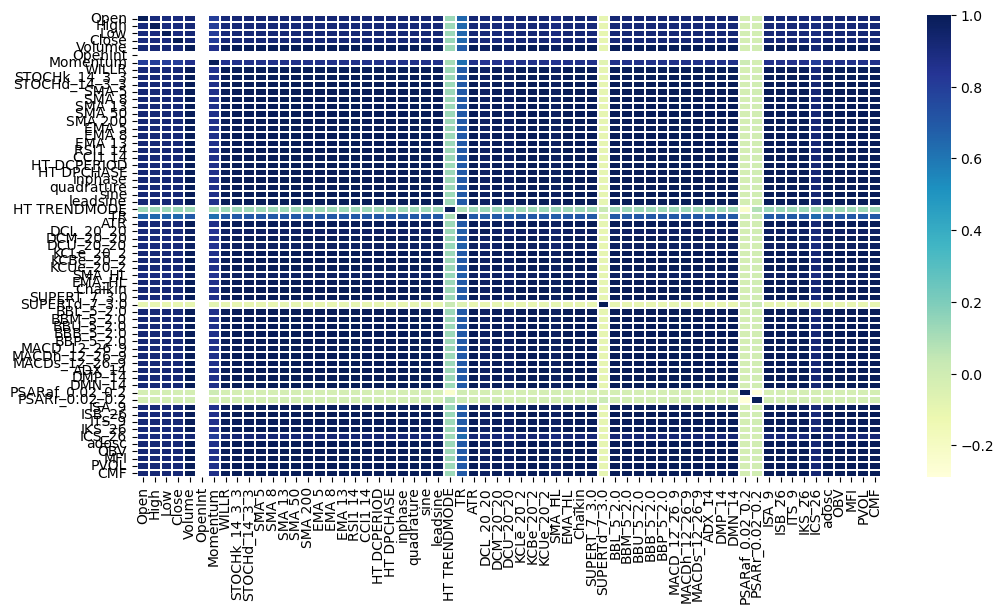

In [201]:
plt.figure(figsize=(12, 6))

corr = temp_data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.2, cmap="YlGnBu")

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [203]:

from xgboost import XGBRegressor
from sklearn import metrics
model = XGBRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train, y_train)
preds = model.predict(X_test)


In [204]:
mae = metrics.mean_absolute_error(y_test, preds)
mse = metrics.mean_squared_error(y_test, preds)
rmse = np.sqrt(mse) # or mse**(0.5)  
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)




Results of sklearn.metrics:
MAE: 2045.5730222727175
MSE: 4184862.3801029273
RMSE: 2045.6936183365601


In [212]:
from sklearn.model_selection import GridSearchCV
PARAMETERS = {"subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[3, 4, 5],
"min_child_weight":[1,5,10],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100,150,200],  "max_depth": [3, 4, 5],
        "gamma":[0.5, 1, 1.5, 2, 5],
        "reg_alpha":[0,1,5],
        "reg_lambda": [0,1,5]}
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [215]:


folds = 3
param_comb = 8
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
xgbc = XGBClassifier()
random_search = RandomizedSearchCV(xgbc, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y) )

random_search.fit(X_train, y_train)


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
'''model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
eval_set = [(X_train, y_train),(X_test,y_test)]
model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)
print(model_gs.bestparams)
predictions = model_gs.predict(X_test)
print('Accuracy:',accuracy_score(y_test, predictions))'''

'model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")\neval_set = [(X_train, y_train),(X_test,y_test)]\nmodel_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)\nprint(model_gs.bestparams)\npredictions = model_gs.predict(X_test)\nprint(\'Accuracy:\',accuracy_score(y_test, predictions))'

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7687.661, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7689.012, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7688.930, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7686.043, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7682.989, Time=1.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7679.342, Time=0.70 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7677.344, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7679.342, Time=0.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7681.342, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7675.782, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7687.405, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=7677.780, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7677.781, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7681.485, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0]          

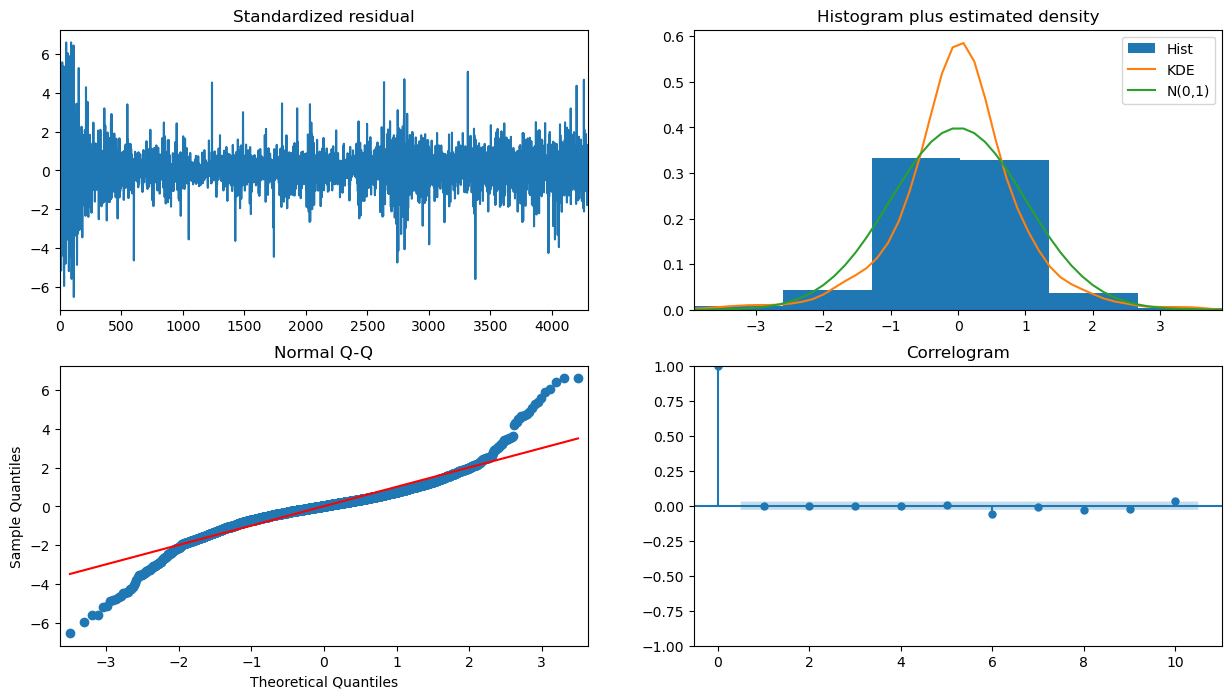

In [217]:
model_autoARIMA = auto_arima(temp_data['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [218]:

model = sm.tsa.arima.ARIMA(temp_data['Close'], order=(2,1,0))
fitted = model.fit()  
print(fitted.summary())


c:\Users\ADITHYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADITHYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADITHYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4296
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3834.891
Date:                Tue, 26 Sep 2023   AIC                           7675.782
Time:                        15:34:35   BIC                           7694.877
Sample:                             0   HQIC                          7682.526
                               - 4296                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0128      0.008     -1.514      0.130      -0.029       0.004
ar.L2         -0.0563      0.008     -6.906      0.000      -0.072      -0.040
sigma2         0.3492      0.004     94.766      0.0

In [219]:
conf = fitted.forecast(321, alpha=0.05)  # 95% conf
fc = fitted.forecast(321, alpha=0.05)  
se= fitted.forecast(321, alpha=0.05)  

c:\Users\ADITHYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ADITHYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\ADITHYA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Users\ADITHYA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ret

In [221]:
# Build Model



fc_series = pd.Series(fc, index=X_train.index)
lower_series = pd.Series(conf[:, 0], index=X_test.index)
upper_series = pd.Series(conf[:, 1], index=X_test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(X_test, label='training')
plt.plot(X-test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'